In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuración ---
# Ruta del archivo CSV de entrada
input_file_path = r'H:\git\proyecto grupal 2\Yelp-Gmaps-Proyecto-DS\data\processed\salubridad_restaurantes_con_ids_procesado.csv'

# Configuración del estilo para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño predeterminado para los gráficos
# --- Fin Configuración ---

print(f"Iniciando EDA para el archivo: {input_file_path}")

# 1. Cargamos los Datos
try:
    df = pd.read_csv(input_file_path, low_memory=False)
    print(f"Archivo cargado exitosamente. Forma del DataFrame: {df.shape}")
except FileNotFoundError:
    print(f"Error: El archivo no fue encontrado en {input_file_path}")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")
    exit()

# 2. Información General del DataFrame
print("\n--- Información Básica del DataFrame ---")
print("Primeras 5 filas:")
print(df.head())

print("\nInformación general (Tipos de datos y Nulos):")
df.info()

print("\nEstadísticas Descriptivas (Columnas Numéricas):")
numeric_cols_desc = ['puntuacion', 'latitud', 'longitud', 'zona_censo']
print(df[numeric_cols_desc].describe())

print("\nEstadísticas Descriptivas (Columnas Categóricas):")
print(df.describe(include=['object', 'category']))

# 3. Limpieza y Preparación de Datos
print("\n--- Preparación de Datos ---")

# Convertimos fecha_inspeccion a datetime
if 'fecha_inspeccion' in df.columns:
    df['fecha_inspeccion'] = pd.to_datetime(df['fecha_inspeccion'], errors='coerce')
    print("'fecha_inspeccion' convertida a datetime.")

# Comprobamos y tratamos valores numericos
if 'puntuacion' in df.columns and df['puntuacion'].dtype == 'object':
    df['puntuacion'] = pd.to_numeric(df['puntuacion'], errors='coerce')
    print("'puntuacion' convertida a numérico (errores como NaN).")

# Conteo  y visualizacion  de valores nulos
print("\nValores Nulos por Columna:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percent})
print(missing_df[missing_df['Count'] > 0].sort_values(by='Percentage', ascending=False))


# 4. Análisis Univariado (Variables Individuales)
print("\n--- Análisis Univariado ---")

Iniciando EDA para el archivo: H:\git\proyecto grupal 2\Yelp-Gmaps-Proyecto-DS\data\processed\salubridad_restaurantes_con_ids_procesado.csv
Archivo cargado exitosamente. Forma del DataFrame: (277686, 18)

--- Información Básica del DataFrame ---
Primeras 5 filas:
   id_nombre  nombre_restaurante calificacion  puntuacion     tipo_cocina  \
0  NOMDD3183        zao men qian          NaN        53.0         Chinese   
1  NOMB9852B    citizens of soho            A        13.0      Australian   
2  NOM5E8F03     los cuencanitos          NaN        27.0  Latin American   
3  NOMA1EBD4    ganni's pizzeria          NaN        21.0           Pizza   
4  NOM6DBBD9  jerk off the grill          NaN         9.0       Caribbean   

    distrito edificio             calle codigo_postal    telefono    latitud  \
0     Queens     4609      KISSENA BLVD         11355  9293058205  40.750452   
1  Manhattan      201  LAFAYETTE STREET         10012  9292285645  40.721344   
2     Queens    54-18  ROOSEVELT 

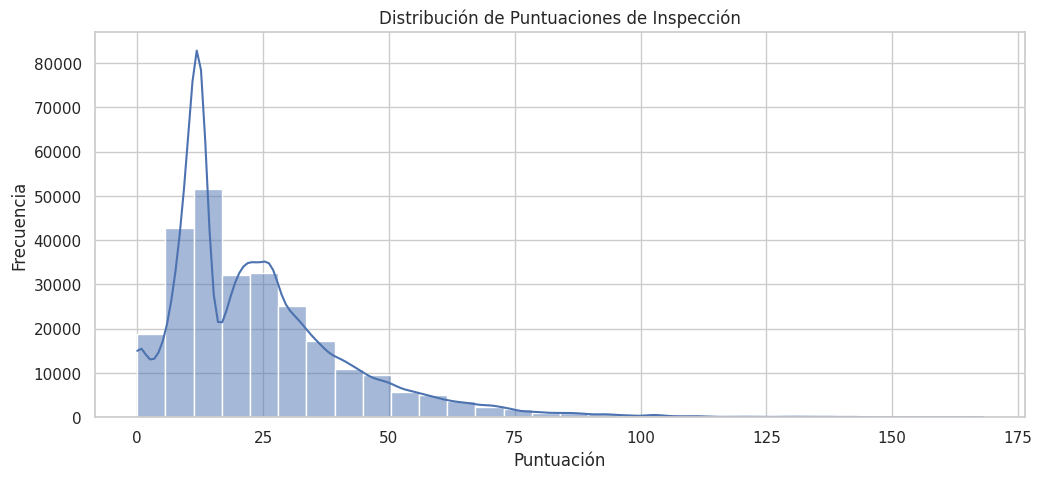

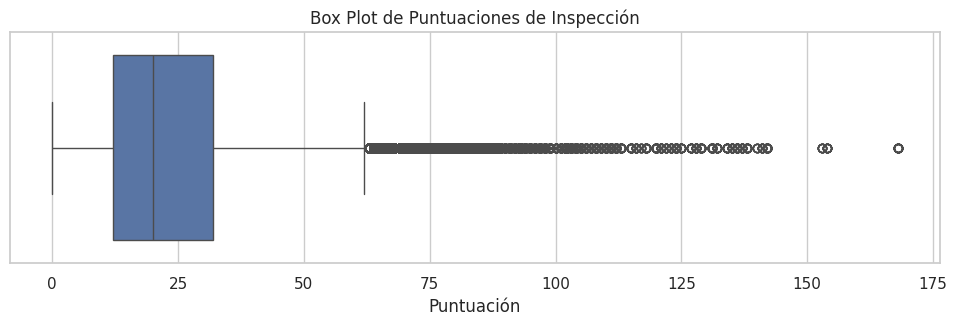

In [2]:
# Distribución de 'puntuacion'
if 'puntuacion' in df.columns:
    plt.figure(figsize=(12, 5))
    sns.histplot(df['puntuacion'].dropna(), bins=30, kde=True)
    plt.title('Distribución de Puntuaciones de Inspección')
    plt.xlabel('Puntuación')
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(12, 3))
    sns.boxplot(x=df['puntuacion'].dropna())
    plt.title('Box Plot de Puntuaciones de Inspección')
    plt.xlabel('Puntuación')
    plt.show()

C:\Users\jrgsi\AppData\Local\Temp\ipykernel_19584\662530232.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['calificacion'], order=order, palette='viridis')


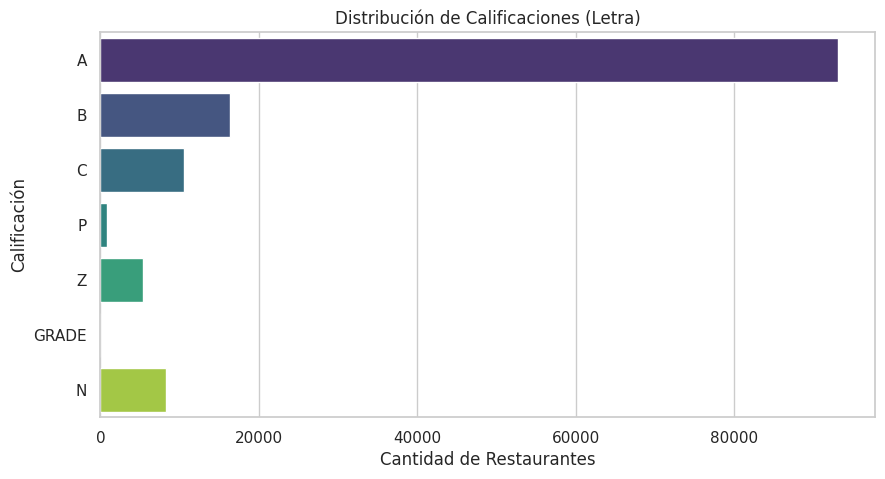

In [ ]:
# Distribución de 'calificacion' (Letra)
if 'calificacion' in df.columns:
    plt.figure(figsize=(10, 5))
    # Ordenamos las calificaciones (A, B, C, etc.) 
    order = sorted(df['calificacion'].dropna().unique())
    try:
        # Intentamos ordenar lógicamente si son A, B, C...
        grade_order = ['A', 'B', 'C', 'P', 'Z'] # Orden común, P=Pending, Z=Grade Pending
        order = [g for g in grade_order if g in df['calificacion'].dropna().unique()] + \
                sorted([g for g in df['calificacion'].dropna().unique() if g not in grade_order])
    except:
        pass # Mantenemos el orden alfabético si falla el orden lógico
    sns.countplot(y=df['calificacion'], order=order, palette='viridis')
    plt.title('Distribución de Calificaciones (Letra)')
    plt.xlabel('Cantidad de Restaurantes')
    plt.ylabel('Calificación')
    plt.show()

C:\Users\jrgsi\AppData\Local\Temp\ipykernel_19584\2916177293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['distrito'], order=df['distrito'].value_counts().index, palette='viridis')


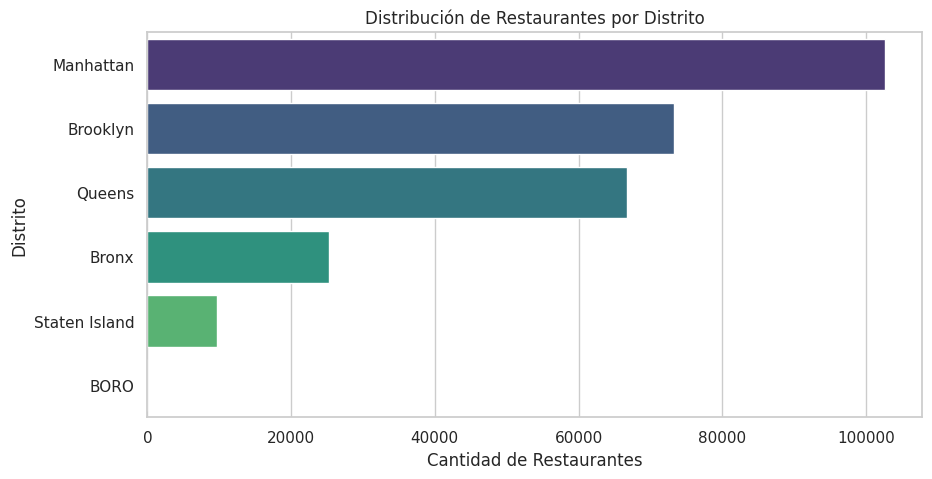

In [4]:
# Distribución de 'distrito' (Borough)
if 'distrito' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df['distrito'], order=df['distrito'].value_counts().index, palette='viridis')
    plt.title('Distribución de Restaurantes por Distrito')
    plt.xlabel('Cantidad de Restaurantes')
    plt.ylabel('Distrito')
    plt.show()

C:\Users\jrgsi\AppData\Local\Temp\ipykernel_19584\2762582936.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')


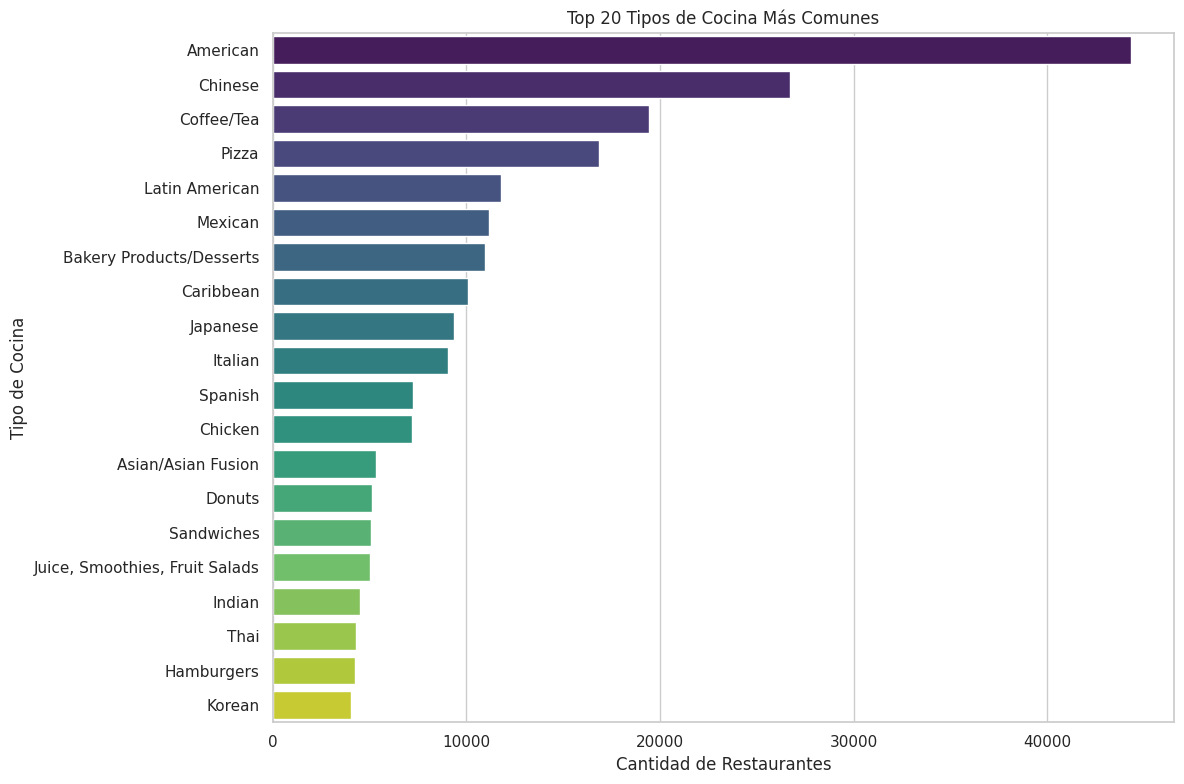

In [ ]:
# Distribución de 'tipo_cocina' (Top N)
if 'tipo_cocina' in df.columns:
    plt.figure(figsize=(12, 8))
    n_top_cuisines = 20 # Mostramos los 20 tipos más comunes
    cuisine_counts = df['tipo_cocina'].value_counts().nlargest(n_top_cuisines)
    sns.barplot(y=cuisine_counts.index, x=cuisine_counts.values, palette='viridis')
    plt.title(f'Top {n_top_cuisines} Tipos de Cocina Más Comunes')
    plt.xlabel('Cantidad de Restaurantes')
    plt.ylabel('Tipo de Cocina')
    plt.tight_layout()
    plt.show()



--- Análisis Bivariado ---


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_19584\2269943918.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='calificacion', y='puntuacion', data=df, order=order, palette='coolwarm')


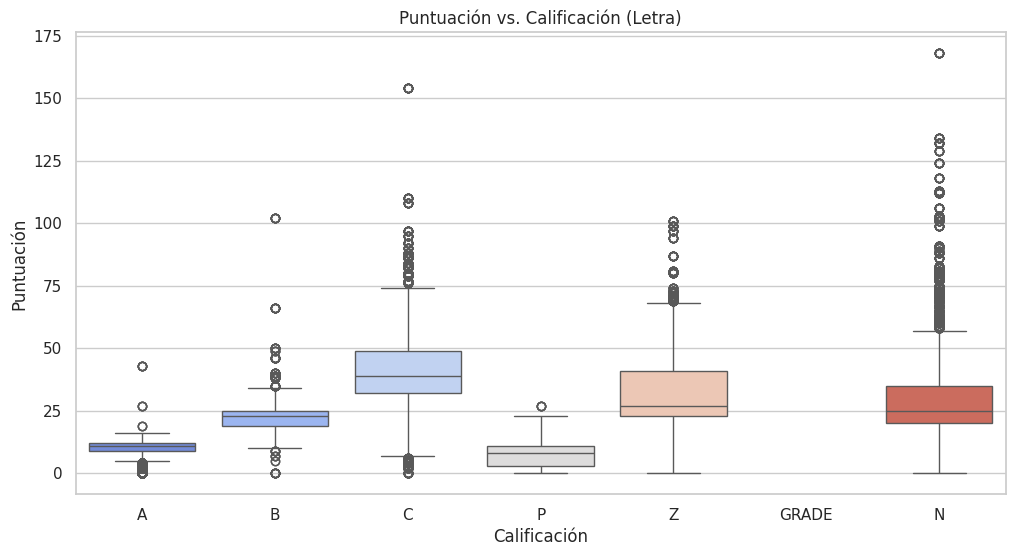

In [ ]:
# 5. Análisis Bivariado (Relaciones entre Variables)
print("\n--- Análisis Bivariado ---")

# Relación entre 'calificacion' y 'puntuacion'
if 'calificacion' in df.columns and 'puntuacion' in df.columns:
    plt.figure(figsize=(12, 6))
    # Usamos el mismo orden de calificaciones que antes
    sns.boxplot(x='calificacion', y='puntuacion', data=df, order=order, palette='coolwarm')
    plt.title('Puntuación vs. Calificación (Letra)')
    plt.xlabel('Calificación')
    plt.ylabel('Puntuación')
    plt.show()

C:\Users\jrgsi\AppData\Local\Temp\ipykernel_19584\2244125073.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='distrito', y='puntuacion', data=df, palette='coolwarm', order=df['distrito'].value_counts().index)


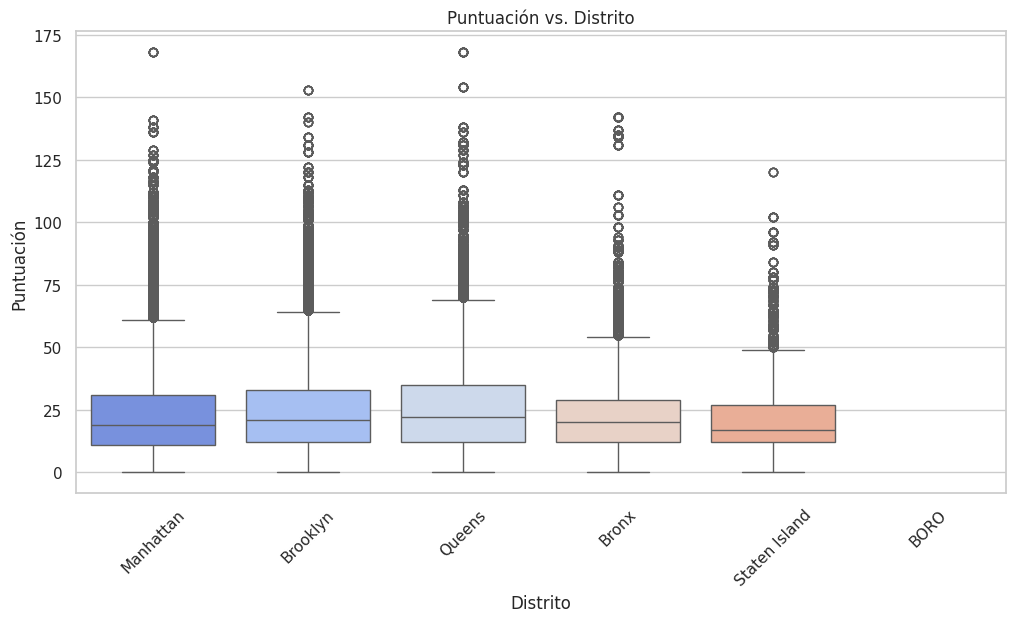

In [7]:
# Relación entre 'distrito' y 'puntuacion'
if 'distrito' in df.columns and 'puntuacion' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='distrito', y='puntuacion', data=df, palette='coolwarm', order=df['distrito'].value_counts().index)
    plt.title('Puntuación vs. Distrito')
    plt.xlabel('Distrito')
    plt.ylabel('Puntuación')
    plt.xticks(rotation=45)
    plt.show()

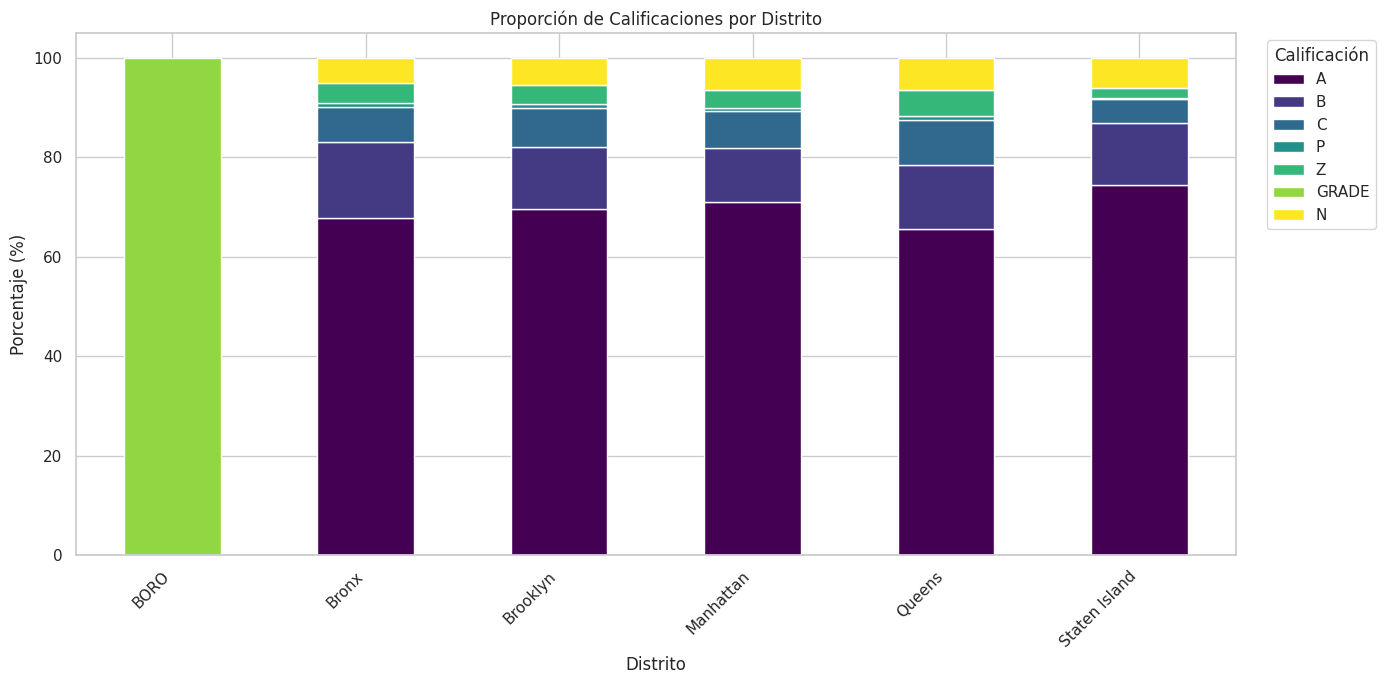

In [ ]:
# Relación entre 'distrito' y 'calificacion'
if 'distrito' in df.columns and 'calificacion' in df.columns:
     # Creamos la tabla de contingencia
    contingency_table = pd.crosstab(df['distrito'], df['calificacion'])
    # Normalizamos para ver proporciones dentro de cada distrito
    contingency_prop = contingency_table.apply(lambda x: x/x.sum() * 100, axis=1)
    
    # Ordenamos las columnas (Calificaciones)
    if order:
        contingency_prop = contingency_prop[order]

    contingency_prop.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
    plt.title('Proporción de Calificaciones por Distrito')
    plt.xlabel('Distrito')
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Calificación', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\jrgsi\AppData\Local\Temp\ipykernel_19584\3398755004.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='puntuacion', y='tipo_cocina', data=df_top_cuisines, order=top_cuisines_list, palette='coolwarm')


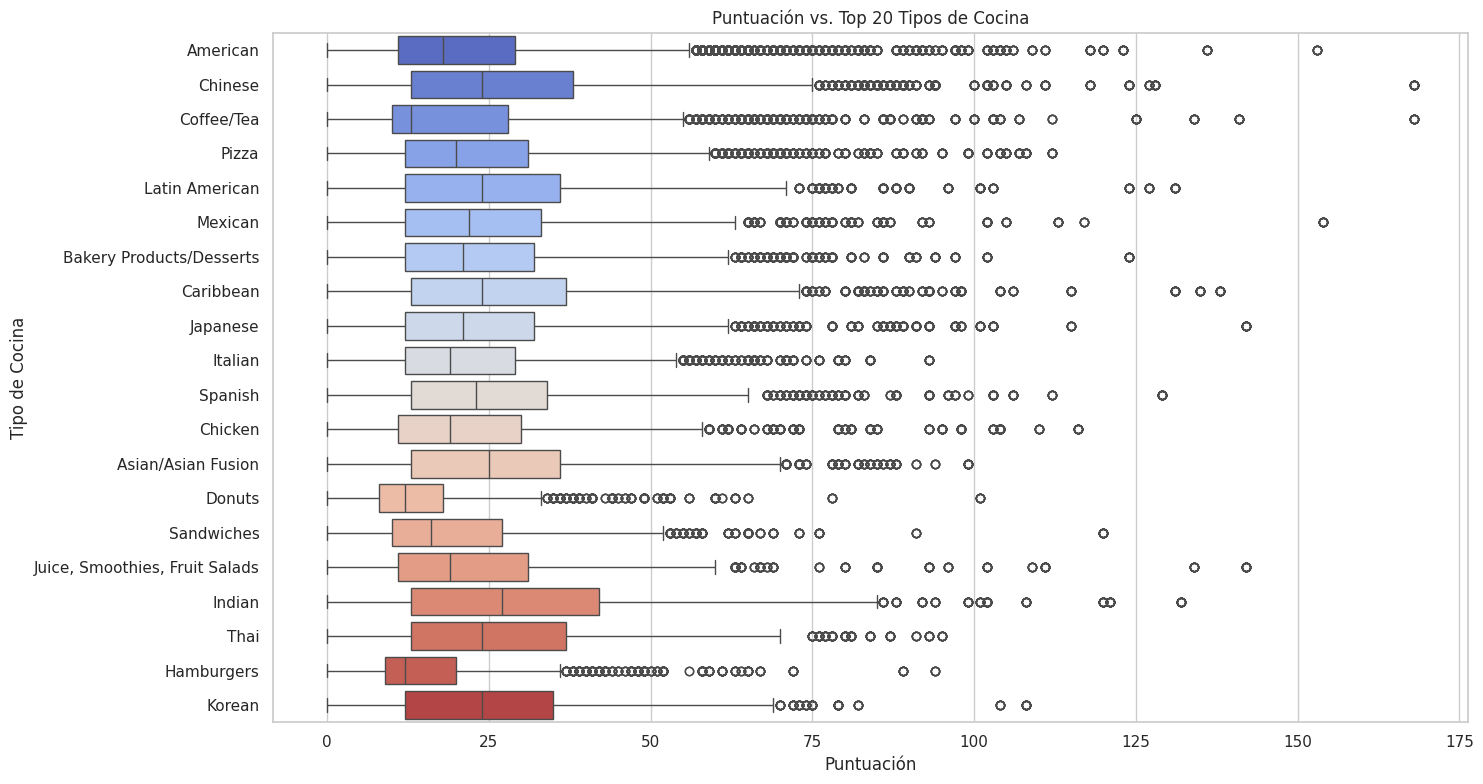

In [11]:

# Relación entre 'tipo_cocina' (Top N) y 'puntuacion'
if 'tipo_cocina' in df.columns and 'puntuacion' in df.columns:
    top_cuisines_list = cuisine_counts.index.tolist()
    df_top_cuisines = df[df['tipo_cocina'].isin(top_cuisines_list)]
    
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='puntuacion', y='tipo_cocina', data=df_top_cuisines, order=top_cuisines_list, palette='coolwarm')
    plt.title(f'Puntuación vs. Top {n_top_cuisines} Tipos de Cocina')
    plt.xlabel('Puntuación')
    plt.ylabel('Tipo de Cocina')
    plt.tight_layout()
    plt.show()

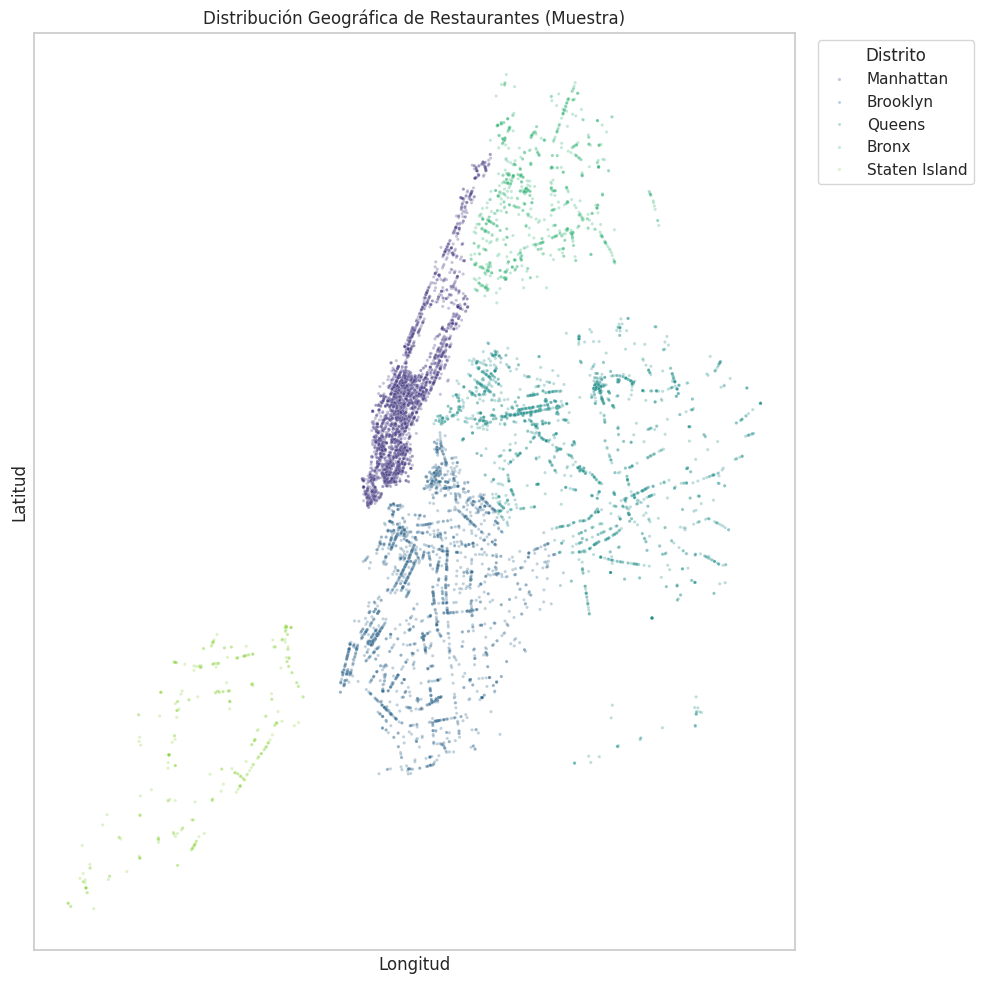

In [ ]:
# Visualización Espacial (Simple Scatter Plot)
if 'longitud' in df.columns and 'latitud' in df.columns:
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='longitud', y='latitud', data=df.sample(min(10000, len(df))), # Muestra aleatoria si es muy grande
                    hue='distrito', # Colorear por distrito
                    palette='viridis',
                    s=5, # Tamaño del punto
                    alpha=0.3, # Transparencia
                    legend='brief') # Leyenda más corta
    plt.title('Distribución Geográfica de Restaurantes (Muestra)')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.xticks([]) # Ocultamos los ejes para un look más de mapa
    plt.yticks([])
    plt.legend(title='Distrito', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


--- Análisis Temporal ---


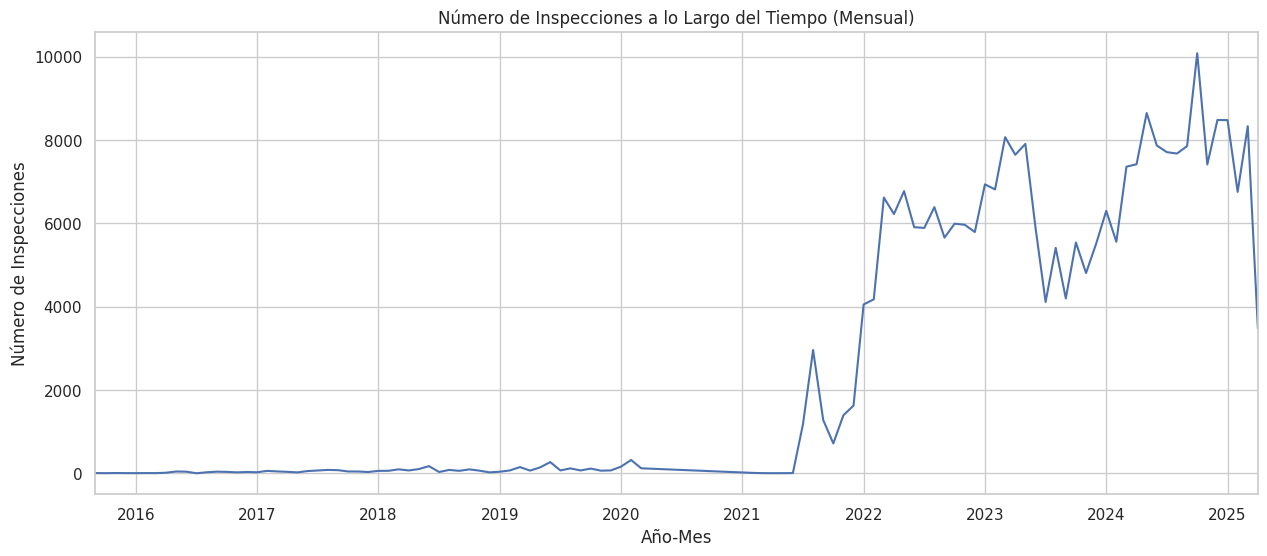

In [13]:
# 6. Análisis Temporal (básico)
if 'fecha_inspeccion' in df.columns:
    print("\n--- Análisis Temporal ---")
    # Asegurarse que no hay NaT antes de agrupar
    df_temporal = df.dropna(subset=['fecha_inspeccion']).copy()
    df_temporal['año_mes'] = df_temporal['fecha_inspeccion'].dt.to_period('M')
    
    inspecciones_por_mes = df_temporal.groupby('año_mes').size()
    
    # Filtrar periodos muy antiguos o futuros si es necesario
    # inspecciones_por_mes = inspecciones_por_mes[inspecciones_por_mes.index > pd.Period('2015-01', 'M')] 
    
    if not inspecciones_por_mes.empty:
        plt.figure(figsize=(15, 6))
        inspecciones_por_mes.plot(kind='line')
        plt.title('Número de Inspecciones a lo Largo del Tiempo (Mensual)')
        plt.xlabel('Año-Mes')
        plt.ylabel('Número de Inspecciones')
        plt.grid(True)
        plt.show()
    else:
        print("No hay suficientes datos de fecha para análisis temporal.")

